<a href="https://colab.research.google.com/github/swarnava-96/Exploratory-Data-Analysis-EDA/blob/main/klib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploratory Data Analysis (EDA) using klib**

#### klib.describe - functions for visualizing datasets
- klib.cat_plot(df) # returns a visualization of the number and frequency of categorical features
- klib.corr_mat(df) # returns a color-encoded correlation matrix
- klib.corr_plot(df) # returns a color-encoded heatmap, ideal for correlations
- klib.dist_plot(df) # returns a distribution plot for every numeric feature
- klib.missingval_plot(df) # returns a figure containing information about missing values

#### klib.clean - functions for cleaning datasets
- klib.data_cleaning(df) # performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)
- klib.clean_column_names(df) # cleans and standardizes column names, also called inside data_cleaning()
- klib.convert_datatypes(df) # converts existing to more efficient dtypes, also called inside data_cleaning()
- klib.drop_missing(df) # drops missing values, also called in data_cleaning()
- klib.mv_col_handling(df) # drops features with high ratio of missing vals based on informational content
- klib.pool_duplicate_subsets(df) # pools subset of cols based on duplicates with min. loss of information

#### klib.preprocess - functions for data preprocessing (feature selection, scaling, ...)
- klib.train_dev_test_split(df) # splits a dataset and a label into train, optionally dev and test sets
- klib.feature_selection_pipe() # provides common operations for feature selection
- klib.num_pipe() # provides common operations for preprocessing of numerical data
- klib.cat_pipe() # provides common operations for preprocessing of categorical data
- klib.preprocess.ColumnSelector() # selects num or cat columns, ideal for a Feature Union or Pipeline
- klib.preprocess.PipeInfo() # prints out the shape of the data at the specified step of a Pipeline

In [1]:
cd "/content/drive/MyDrive/Datasets"

/content/drive/MyDrive/Datasets


### Installing klib

In [2]:
!pip install klib

### Loading the dataset

In [1]:
import klib
import pandas as pd
import seaborn as sns

df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## EDA with klib
### Catplot

GridSpec(6, 7)

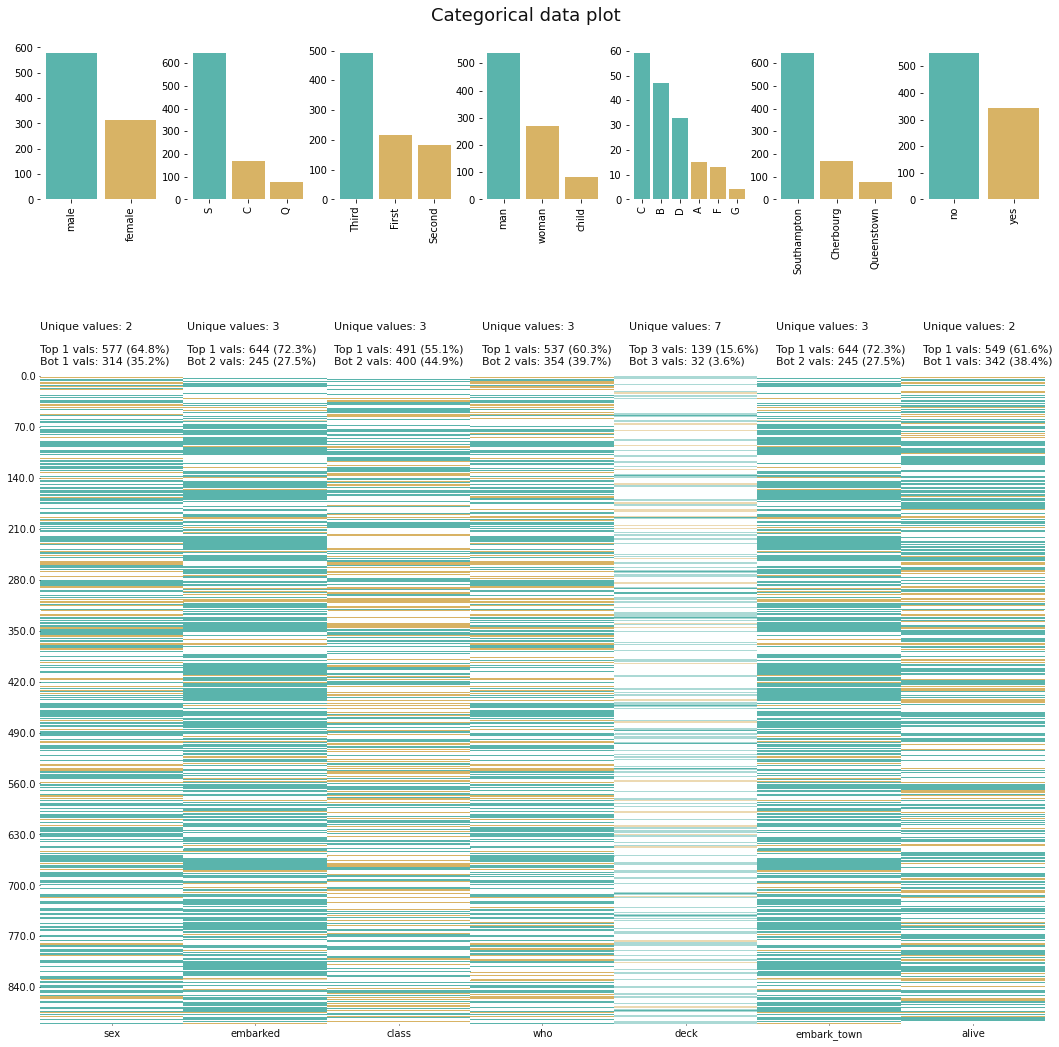

In [6]:
# returns a visualization of the number and frequency of categorical features

df1 = df.drop(["alone", "adult_male"], axis = 1)
klib.cat_plot(df1)

### Correlation Matrix

In [7]:
# returns a color-encoded correlation matrix

klib.corr_mat(df)

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.00,-0.34,-0.08,-0.04,0.08,0.26,-0.56,-0.20
pclass,-0.34,1.00,-0.37,0.08,0.02,-0.55,0.09,0.14
age,-0.08,-0.37,1.00,-0.31,-0.19,0.10,0.28,0.20
sibsp,-0.04,0.08,-0.31,1.00,0.41,0.16,-0.25,-0.58
parch,0.08,0.02,-0.19,0.41,1.00,0.22,-0.35,-0.58
fare,0.26,-0.55,0.10,0.16,0.22,1.00,-0.18,-0.27
adult_male,-0.56,0.09,0.28,-0.25,-0.35,-0.18,1.00,0.40
alone,-0.20,0.14,0.20,-0.58,-0.58,-0.27,0.40,1.00


### Heatmap

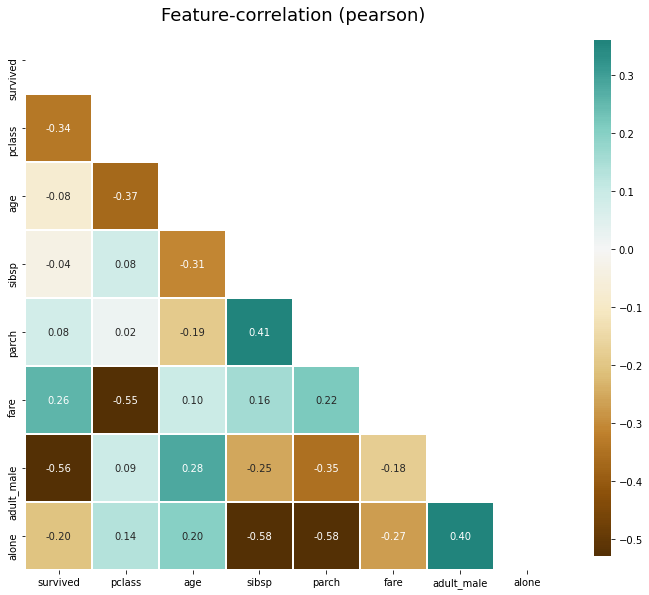

In [8]:
# returns a color-encoded heatmap, ideal for correlations

klib.corr_plot(df)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.
Displaying negative correlations. Specify a negative "threshold" to limit the results further.


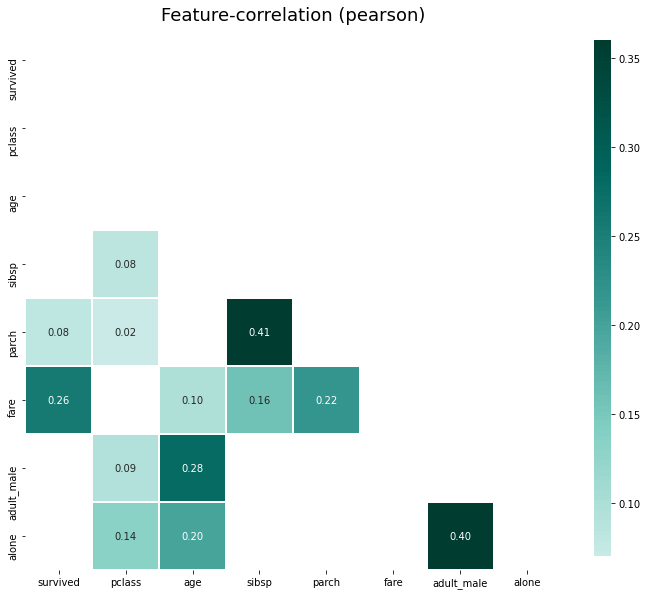

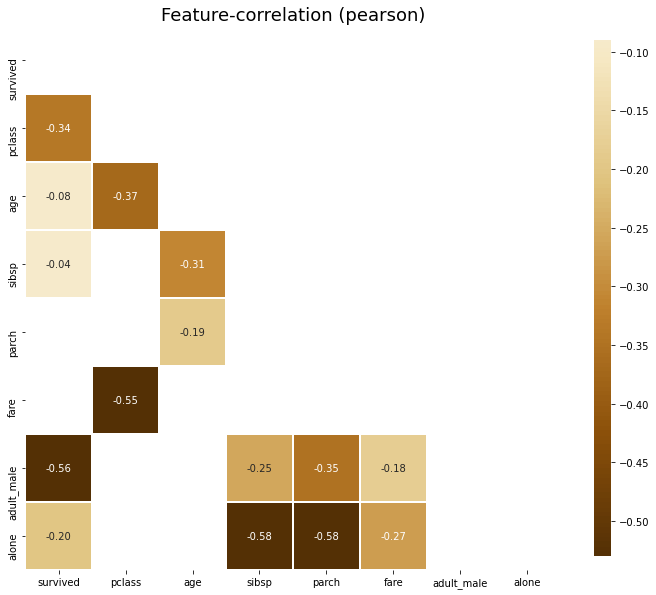

In [9]:
# displaying only positive correlations, other settings include threshold, cmap...
klib.corr_plot(df, split='pos')
# displaying only negative correlations
klib.corr_plot(df, split='neg')

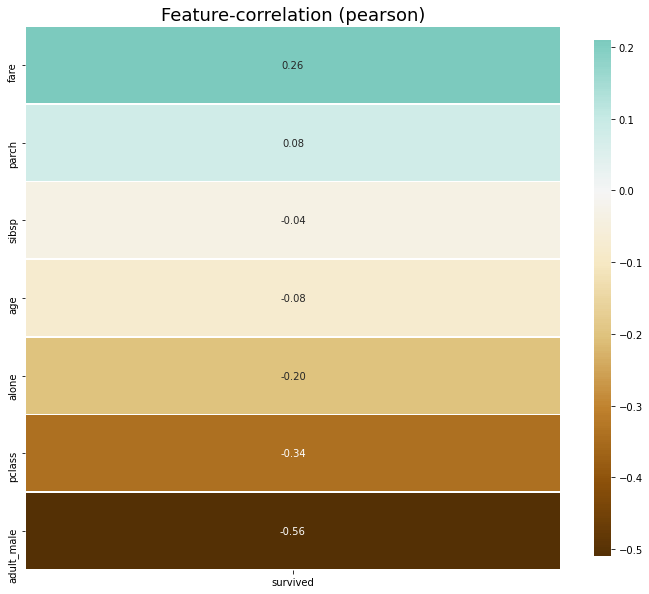

In [10]:
# default representation of correlations with the feature column

klib.corr_plot(df, target='survived')

### Distribution Plot

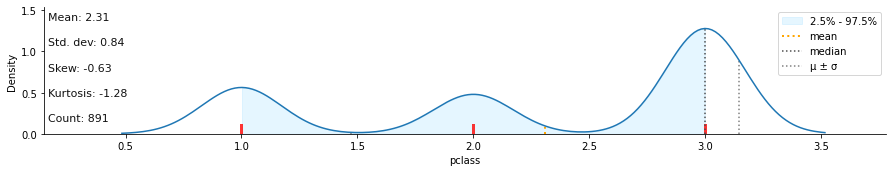

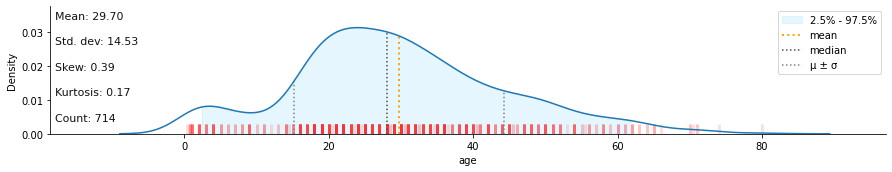

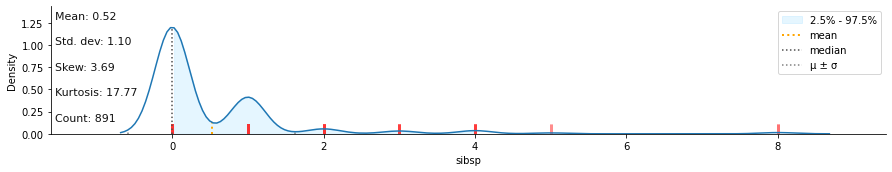

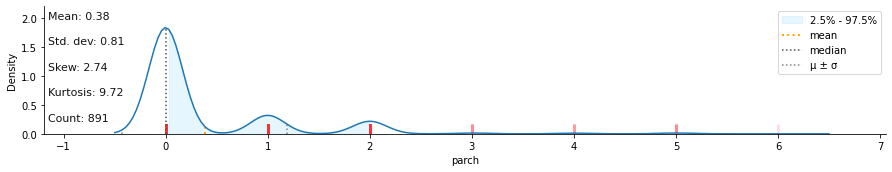

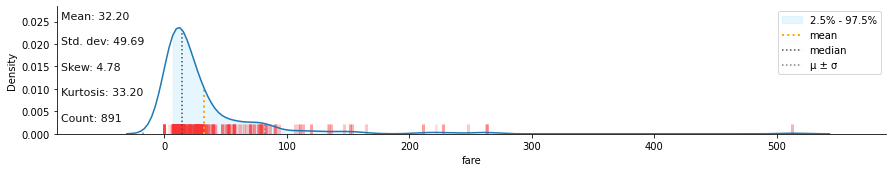

In [11]:
# returns a distribution plot for every numeric feature

klib.dist_plot(df)

### Missing Value plot

GridSpec(6, 6)

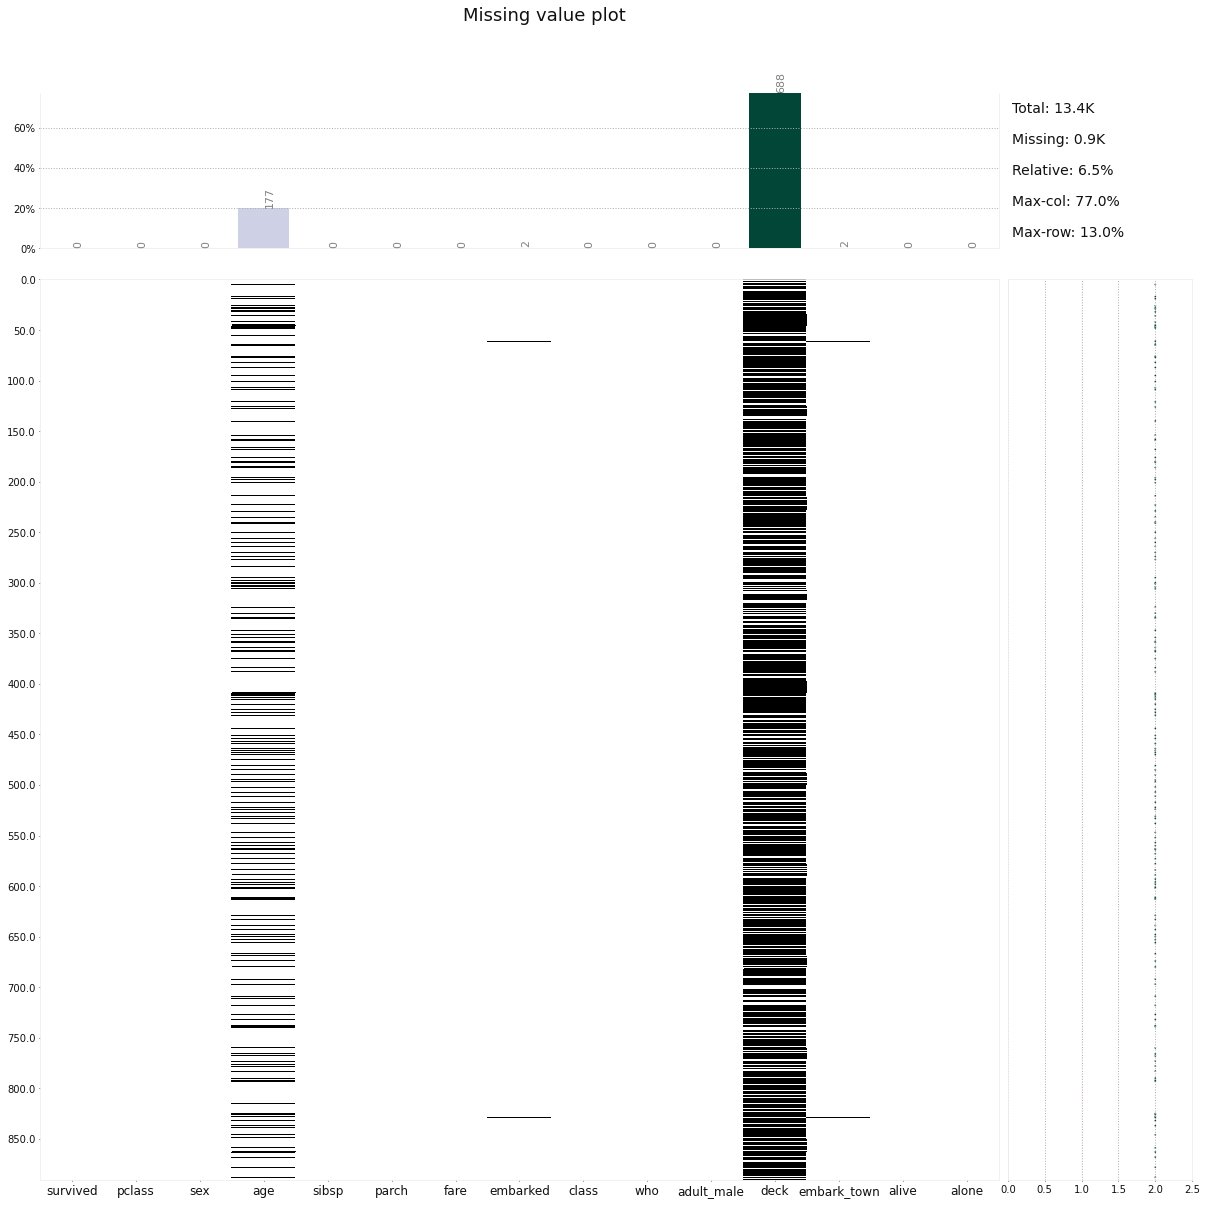

In [12]:
# returns a figure containing information about missing values

klib.missingval_plot(df)

### Data Cleaning

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [17]:
# performs datacleaning (drop duplicates & empty rows/cols, adjust dtypes,...)

df_clean = klib.data_cleaning(df)

Shape of cleaned data: (784, 15)Remaining NAs: 692

Changes:
Dropped rows: 107
     of which 107 duplicates. (Rows: [47, 76, 77, 87, 95, 101, 121, 133, 173, 196, 198, 201, 213, 223, 241, 260, 274, 295, 300, 304, 313, 320, 324, 335, 343, 354, 355, 358, 359, 364, 368, 384, 409, 410, 413, 418, 420, 425, 428, 431, 454, 459, 464, 466, 470, 476, 481, 485, 488, 490, 494, 500, 511, 521, 522, 526, 531, 560, 563, 564, 568, 573, 588, 589, 598, 601, 612, 613, 614, 635, 636, 640, 641, 644, 646, 650, 656, 666, 674, 692, 696, 709, 732, 733, 734, 738, 739, 757, 758, 760, 773, 790, 792, 800, 808, 832, 837, 838, 844, 846, 859, 863, 870, 877, 878, 884, 886])
Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 177
Reduced memory by at least: 0.06 MB (-75.0%)



In [18]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 784 entries, 0 to 783
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     784 non-null    int8    
 1   pclass       784 non-null    int8    
 2   sex          784 non-null    category
 3   age          678 non-null    float32 
 4   sibsp        784 non-null    int8    
 5   parch        784 non-null    int8    
 6   fare         784 non-null    float32 
 7   embarked     782 non-null    category
 8   class        784 non-null    category
 9   who          784 non-null    category
 10  adult_male   784 non-null    boolean 
 11  deck         202 non-null    category
 12  embark_town  782 non-null    category
 13  alive        784 non-null    category
 14  alone        784 non-null    boolean 
dtypes: boolean(2), category(7), float32(2), int8(4)
memory usage: 18.7 KB


### Column names cleaning

In [22]:
# cleans and standardizes column names, also called inside data_cleaning()

column_clean = klib.clean_column_names(df)
column_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### Converting data types

In [23]:
 # converts existing to more efficient dtypes, also called inside data_cleaning()

datatypes = klib.convert_datatypes(df)

In [24]:
datatypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int8    
 1   pclass       891 non-null    int8    
 2   sex          891 non-null    category
 3   age          714 non-null    float32 
 4   sibsp        891 non-null    int8    
 5   parch        891 non-null    int8    
 6   fare         891 non-null    float32 
 7   embarked     889 non-null    category
 8   class        891 non-null    category
 9   who          891 non-null    category
 10  adult_male   891 non-null    boolean 
 11  deck         203 non-null    category
 12  embark_town  889 non-null    category
 13  alive        891 non-null    category
 14  alone        891 non-null    boolean 
dtypes: boolean(2), category(7), float32(2), int8(4)
memory usage: 21.1 KB


### Column Handling

In [4]:
# drops features with high ratio of missing vals based on informational content

klib.mv_col_handling(df)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


Here "deck" feature is removed.